In [1]:
# importing libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PK = df[(df['job_country']== 'Pakistan') & (df['job_title_short']== 'Data Analyst')]

In [4]:
df_DA_PK.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
642352,Data Analyst,Data Analyst/Statistician,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-09-08 13:32:18,False,False,Pakistan,None,NaN,NaN,Interactive Research & Development (IRD),None,None
408056,Data Analyst,Senior Analytics Engineer I (Pro-active Pipeli...,Pakistan,via Melga,Full-time,False,Pakistan,2023-03-07 16:35:42,True,False,Pakistan,None,NaN,NaN,PMCL-JAZZ,None,None
13380,Data Analyst,Manager Research & Data Analytics,"Karachi, Pakistan",via LinkedIn,Full-time,False,Pakistan,2023-09-13 13:14:15,False,False,Pakistan,None,NaN,NaN,K-Electric,"[excel, sap]","{'analyst_tools': ['excel', 'sap']}"
470284,Data Analyst,Data Analyst,"Dera Ismail Khan, Pakistan",via Indeed,Full-time,False,Pakistan,2023-05-15 14:55:32,True,False,Pakistan,None,NaN,NaN,Confidential,None,None
45887,Data Analyst,Principle BI-DW Engineer,"Karachi, Pakistan",via Tech Junction,Contractor,False,Pakistan,2023-05-17 06:37:56,False,False,Pakistan,None,NaN,NaN,Kuza Ventures,None,None


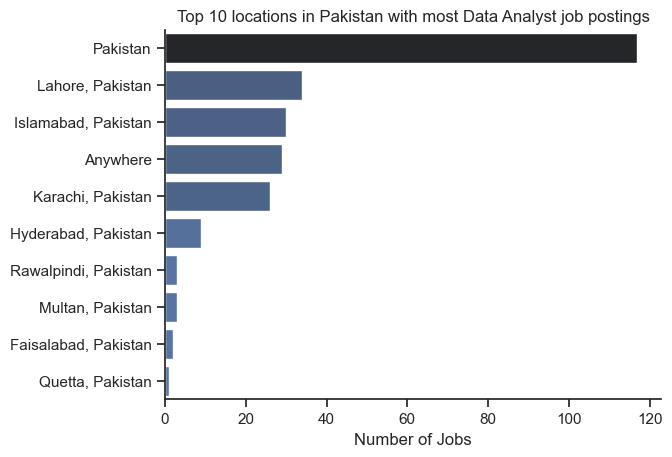

In [6]:
df_plot= df_DA_PK['job_location'].value_counts().head(10).to_frame()

import seaborn as sns

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 locations in Pakistan with most Data Analyst job postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

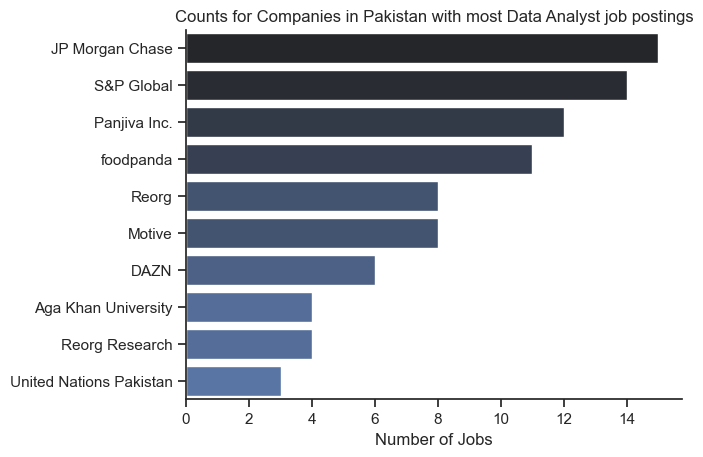

In [7]:
df_plot= df_DA_PK['company_name'].value_counts().head(10).to_frame()

import seaborn as sns

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts for Companies in Pakistan with most Data Analyst job postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

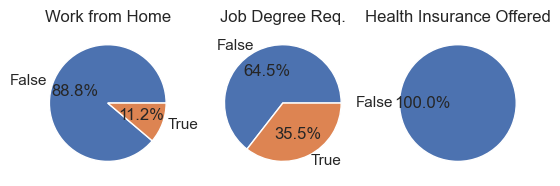

In [8]:
fig,ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
    }
for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_PK[column].value_counts(), labels = df_DA_PK[column].value_counts().index, autopct='%1.1f%%')
    ax[i].set_title(title)


# ax.pie(df['dict_column'].value_counts())
plt.show()